In [15]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
benchmarks = pd.read_csv("benchmarks.csv")
benchmarks["ipc"] =  benchmarks["instructions"] / benchmarks["cycles"] 
benchmarks["d_tlb_load_misses_pct"] = benchmarks["d_tlb_load_misses"] / benchmarks["d_tlb_loads"]
benchmarks["llc_load_missses_pct"] = benchmarks["llc_load_misses"] / benchmarks["llc_loads"] 
benchmarks["l1_load_missses_pct"] = benchmarks["l1_cache_load_misses"] / benchmarks["l1_cache_loads"]
benchmarks["cache_misses_pct"] = benchmarks["cache_misses"] / benchmarks["cache_references"]
benchmarks["branch_misses_pct"] = benchmarks["branch_misses"] / benchmarks["branch_instructions"]
b_threads = benchmarks[benchmarks["kind"] == "threads"]
b_tasks = benchmarks[benchmarks["kind"] == "tasks"]

benchmarks["virtual_memory"] = benchmarks["msg_size"]

stack_size = 2 * 1024 * 1024
tmp_vm = []
tmp_rm = []

for (idx,msg_size) in enumerate(benchmarks["msg_size"]):
    is_thread = benchmarks["kind"][idx] == "threads"
    num_msg_size = 0
    if(msg_size == "512kb"):
        num_msg_size = 512 * 1024
    else:
        num_msg_size = int(msg_size)

    if(is_thread):
        tmp_vm.append((num_msg_size * benchmarks["connections"][idx]) + (benchmarks["connections"][idx] * stack_size) + (206228 * 1024))
        tmp_rm.append((1024 * 1024) + (num_msg_size * benchmarks["connections"][idx]) + (benchmarks["connections"][idx] * 4086))
    else:
        tmp_vm.append(num_msg_size * benchmarks["connections"][idx]  + (275764 * 1024))
        tmp_rm.append((1024 * 1632) + (num_msg_size * benchmarks["connections"][idx]))

benchmarks["virtual_memory"] = tmp_vm
benchmarks["reserved_memory"] = tmp_rm


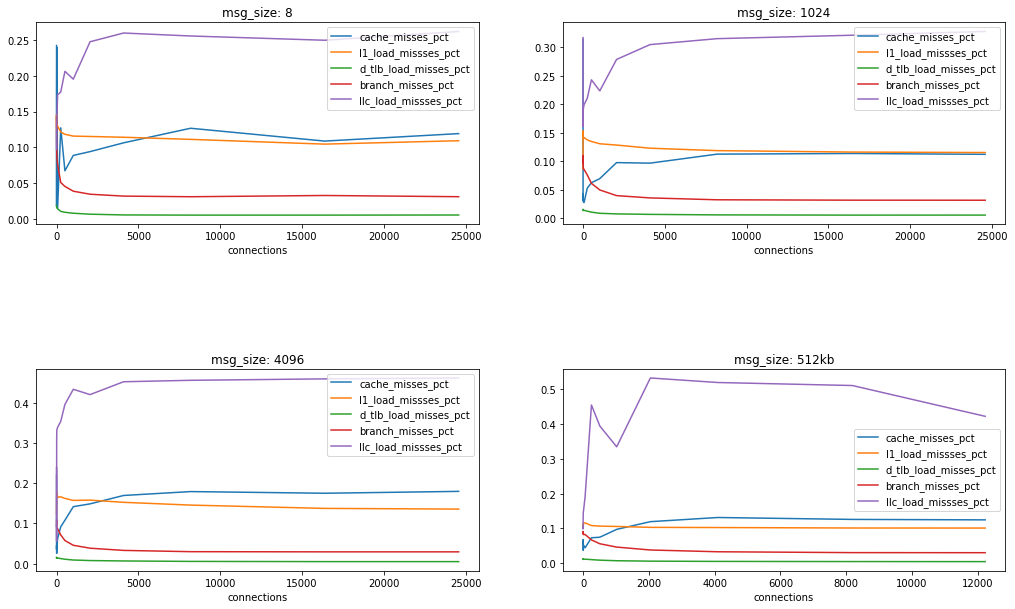

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2)


msg_size = "8"
msg_filtered = benchmarks[benchmarks["msg_size"] == msg_size]
msg_filtered = msg_filtered[msg_filtered["kind"] == "threads"].reset_index(drop=True)

items= msg_filtered.filter(items=["connections","cache_misses_pct" ,"l1_load_missses_pct","d_tlb_load_misses_pct", "branch_misses_pct", "llc_load_missses_pct"])

plot = items.plot(x="connections",ax=axes[0,0])
plot.set_title(f"msg_size: {msg_size}")


msg_size = "1024"
msg_filtered = benchmarks[benchmarks["msg_size"] == msg_size]
msg_filtered = msg_filtered[msg_filtered["kind"] == "threads"].reset_index(drop=True)

items= msg_filtered.filter(items=["connections","cache_misses_pct" ,"l1_load_missses_pct","d_tlb_load_misses_pct", "branch_misses_pct", "llc_load_missses_pct"])

plot = items.plot(x="connections",ax=axes[0,1])
plot.set_title(f"msg_size: {msg_size}")


msg_size = "4096"
msg_filtered = benchmarks[benchmarks["msg_size"] == msg_size]
msg_filtered = msg_filtered[msg_filtered["kind"] == "threads"].reset_index(drop=True)

items= msg_filtered.filter(items=["connections","cache_misses_pct" ,"l1_load_missses_pct","d_tlb_load_misses_pct", "branch_misses_pct", "llc_load_missses_pct"])

plot = items.plot(x="connections",ax=axes[1,0])
plot.set_title(f"msg_size: {msg_size}")


msg_size = "512kb"
msg_filtered = benchmarks[benchmarks["msg_size"] == msg_size]
msg_filtered = msg_filtered[msg_filtered["kind"] == "threads"].reset_index(drop=True)

items= msg_filtered.filter(items=["connections","cache_misses_pct" ,"l1_load_missses_pct","d_tlb_load_misses_pct", "branch_misses_pct", "llc_load_missses_pct"])

plot = items.plot(x="connections",ax=axes[1,1])
plot.set_title(f"msg_size: {msg_size}")


fig.tight_layout()
fig.set_size_inches(15.0, 10.0)
